# Toda Yamamoto Causality Test

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import zivot_andrews as zt
from statsmodels.tsa import tsatools as stt

In [41]:
data0=pd.read_excel('gini-inf.xls')

In [42]:
data0

,years,gini,inf
0,2006,0.403,9.586667
1,2007,0.387,8.783333
2,2008,0.386,10.433333
3,2009,0.394,6.279167
4,2010,0.380,8.583333
5,2011,0.383,6.451667
6,2012,0.382,8.935833
7,2013,0.382,7.494167
8,2014,0.379,8.852500
9,2015,0.386,7.665833


In [47]:
dy=data0['gini'].diff().fillna(0)
dx=data0['inf'].diff().fillna(0)

In [48]:
y=np.array(data0.iloc[:,1:2])
x=np.array(data0.iloc[:,-1])
dy=np.array(dy)
dx=np.array(dx)

## $y~;Gini Coefficient~~~dy~;First Difference$ <br>
## $x~;Consumer Inflation~~~dx;First Difference$

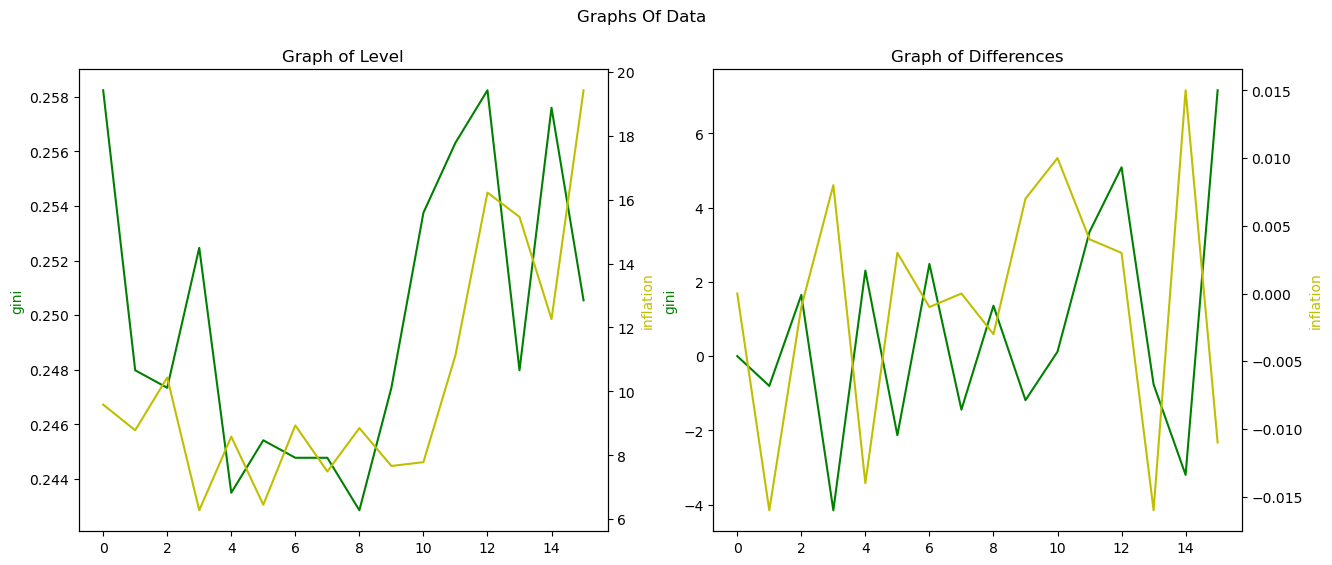

In [98]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Graphs Of Data')

axs[0].set_title('Graph of Level')   
axs[0].plot(y, 'g-')
axs[0].set_ylabel('gini', color='g')

axs[0] = axs[0].twinx()
axs[0].plot(x, 'y-')
axs[0].set_ylabel('inflation', color='y')

axs[1].set_title('Graph of Differences')   
axs[1].plot(dx, 'g-')
axs[1].set_ylabel('gini', color='g')

axs[1] = axs[1].twinx()
axs[1].plot(dy, 'y-')
axs[1].set_ylabel('inflation', color='y')

plt.show()

## Unit Root Analysis

In [50]:
adfuller(x,regression='ct')

(1.000763228005254,
 1.0,
 3,
 12,
 {'1%': -4.988247662037037, '5%': -3.865364768518518, '10%': -3.382725},
 39.38713969731792)

In [51]:
adfuller(dx,regression='ct')

(-5.51136968931478,
 2.1882354285488762e-05,
 2,
 13,
 {'1%': -4.8844381383705056,
  '5%': -3.8223332407828856,
  '10%': -3.3593537778789258},
 44.35117720921957)

In [52]:
adfuller(y,regression='c')

(-2.8744274871945756,
 0.04840357127221193,
 0,
 15,
 {'1%': -3.9644434814814815,
  '5%': -3.0849081481481484,
  '10%': -2.6818144444444445},
 -58.33925329911925)

In [53]:
adfuller(dy,regression='c')

(-5.354399799714696,
 4.220068503890554e-06,
 0,
 15,
 {'1%': -3.9644434814814815,
  '5%': -3.0849081481481484,
  '10%': -2.6818144444444445},
 -57.691094646448946)

In [54]:
zt(y,regression='ct')

(-5.3700821105489895,
 0.021066237044970407,
 {'1%': -5.57556, '5%': -5.07332, '10%': -4.82668},
 0,
 9)

In [55]:
data0.iloc[9,:]

years    2015.000000
gini        0.386000
inf         7.665833
Name: 9, dtype: float64

### $x=I(1)~~;~~~y=I(0)~with~structural~break~,y=I(1)~~with~ADF$ <br>
## $d_{max}=1$

### Data For VAR

In [99]:
vardata=np.column_stack((y,x))

In [100]:
vardata.shape

(16, 2)

## Optimal Lag Point

In [101]:
def lag_order(x,maxlag):
    llf=[]
    params=[]
    obs=[]
    for i in range(0,maxlag+1):
        mod=VAR(x)
        res=mod.fit(i)
        llf.append(res.llf)
        params.append(res.df_model)
        obs.append(len(x)*2-i)
    params=pd.DataFrame(params)
    obs=pd.DataFrame(obs)
    lobs=np.log(obs)
    llf=pd.DataFrame(llf)
    AIC=pd.DataFrame((-2*llf+2*(params*2-1))/obs)
    BIC=pd.DataFrame((-2*llf+(params*2-1)*lobs)/obs)
    outputs=pd.concat([AIC,BIC],axis=1)
    print(outputs)

In [102]:
lag_order(vardata,3)

          0         0
0 -1.122102 -1.076298
1 -1.399391 -1.168103
2 -1.305784 -0.885424
3 -0.951737 -0.338811


## $opt.lag=(p+d_{max})$

## Estimate VAR

In [60]:
model=VAR(vardata)

In [61]:
result=model.fit(2)

In [62]:
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 21, May, 2023
Time:                     09:48:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -7.87454
Nobs:                     14.0000    HQIC:                  -8.37326
Log likelihood:           28.5868    FPE:                0.000257331
AIC:                     -8.33100    Det(Omega_mle):     0.000139714
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.173481         0.120319            1.442           0.149
L1.y1         0.264880         0.337772            0.784           0.433
L1.y2         0.000567         0.000825            0.688           0.492
L2.y1         0.020707

#### Normality Test

In [63]:
print(result.test_normality(signif=0.05))

<statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults object. H_0: data generated by normally-distributed process: fail to reject at 5% significance level. Test statistic: 1.652, critical value: 9.488>, p-value: 0.799>


#### Portmanteau Test For Autocorrelation

In [64]:
print(result.test_whiteness(nlags=3, signif=0.05, adjusted=False))

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 3 is zero: fail to reject at 5% significance level. Test statistic: 5.692, critical value: 9.488>, p-value: 0.223>


#### VAR Inverse Roots

In [65]:
np.abs(1/result.roots)

array([0.035994  , 0.2439834 , 0.64386607, 0.91359062])

### Causality Test

## $ y_{t}=\theta_{10}+\sum_{i=1}^{m}{\beta_{1i}y_{t-i}}+\sum_{i=m+1}^{m+{d_{max}}}{\beta_{2i}y_{t-i}}+\sum_{i=1}^{m}{\omega_{1i}x_{t-i}}+\sum_{i=m+1}^{m+{d_{max}}}{\omega_{2i}x_{t-i}}+\epsilon_{1t} $

## $ x_{t}=\theta_{20}+\sum_{i=1}^{m}{\delta_{1i}x_{t-i}}+\sum_{i=m+1}^{m+{d_{max}}}{\delta_{2i}x_{t-i}}+\sum_{i=1}^{m}{\alpha_{1i}y_{t-i}}+\sum_{i=m+1}^{m+{d_{max}}}{\alpha_{2i}y_{t-i}}+\epsilon_{2t} $

In [68]:
y.shape

(16, 1)

In [69]:
x=x.reshape(16,1)

## $x~~\to~~y$ <br>
## $H_{0}:\omega_{1i}=\omega_{2i}=0;~~Consumer~inflation~does~not~ cause~gini~coefficient$<br>

In [70]:
model1=ARDL(y,2,x,[1,2]).fit()

In [71]:
print(model1.summary().tables[1])
print(model1.f_test("x0.L1=x0.L2=0"))

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1735      0.120      1.442      0.183      -0.099       0.446
y.L1           0.2649      0.338      0.784      0.453      -0.499       1.029
y.L2           0.0207      0.387      0.053      0.959      -0.855       0.897
x0.L1          0.0006      0.001      0.688      0.509      -0.001       0.002
x0.L2      -7.438e-05      0.001     -0.110      0.915      -0.002       0.001
<F test: F=0.264437272708174, p=0.7733997923939043, df_denom=9, df_num=2>


## $y~~\to~~x$ <br>
## $H_{0}:\alpha_{1i}=\alpha_{2i}=0;~~~~Gini~coefficient~does~not~ cause~consumer~inflation~$ <br>

In [72]:
model2=ARDL(x,2,y,[1,2]).fit()

In [73]:
print(model2.summary().tables[1])
print(model2.f_test("x0.L1=x0.L2=0"))

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -118.4122     46.233     -2.561      0.031    -223.000     -13.825
y.L1           0.2128      0.317      0.672      0.519      -0.504       0.930
y.L2           0.2883      0.260      1.111      0.295      -0.299       0.875
x0.L1        508.5239    129.791      3.918      0.004     214.916     802.132
x0.L2        -10.8035    148.775     -0.073      0.944    -347.357     325.750
<F test: F=7.679137040789865, p=0.011328749778070848, df_denom=9, df_num=2>


## Conclusion

Acording to Toda-Yamamoto Causality Test, when consumer inflation does not granger cause gini coefficient, gini coefficient does granger cause consumer inflation.From this point, it can be said that the factors that cause to injustice at distribution of wealth are cause of consumer inflation. The cause of injustice of wealth distribution should research for reach the more concrete facts. Maybe, incresed money supply, deformations at justice system,  high producter inflation are cause of distruptions at wealth distribution. But, this can be subject of an other research.

# $Y~\to~X$ <br>
# $X~\not\to~Y$